In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerTuple
from astropy.table import Table


plt.style.use('../../../format.mplstyle')

In [16]:
def load_table(data_file):
    table = Table.read(data_file, format='ascii',names=('MJD','lum','dlum'))
    return table 

In [17]:
hgw = load_table('hgw_bol_LC')
jfo = load_table('jfo_bol_LC')
jww = load_table('jww_bol_LC')
rth = load_table('rth_bol_LC')

In [18]:
print(len(hgw))

142


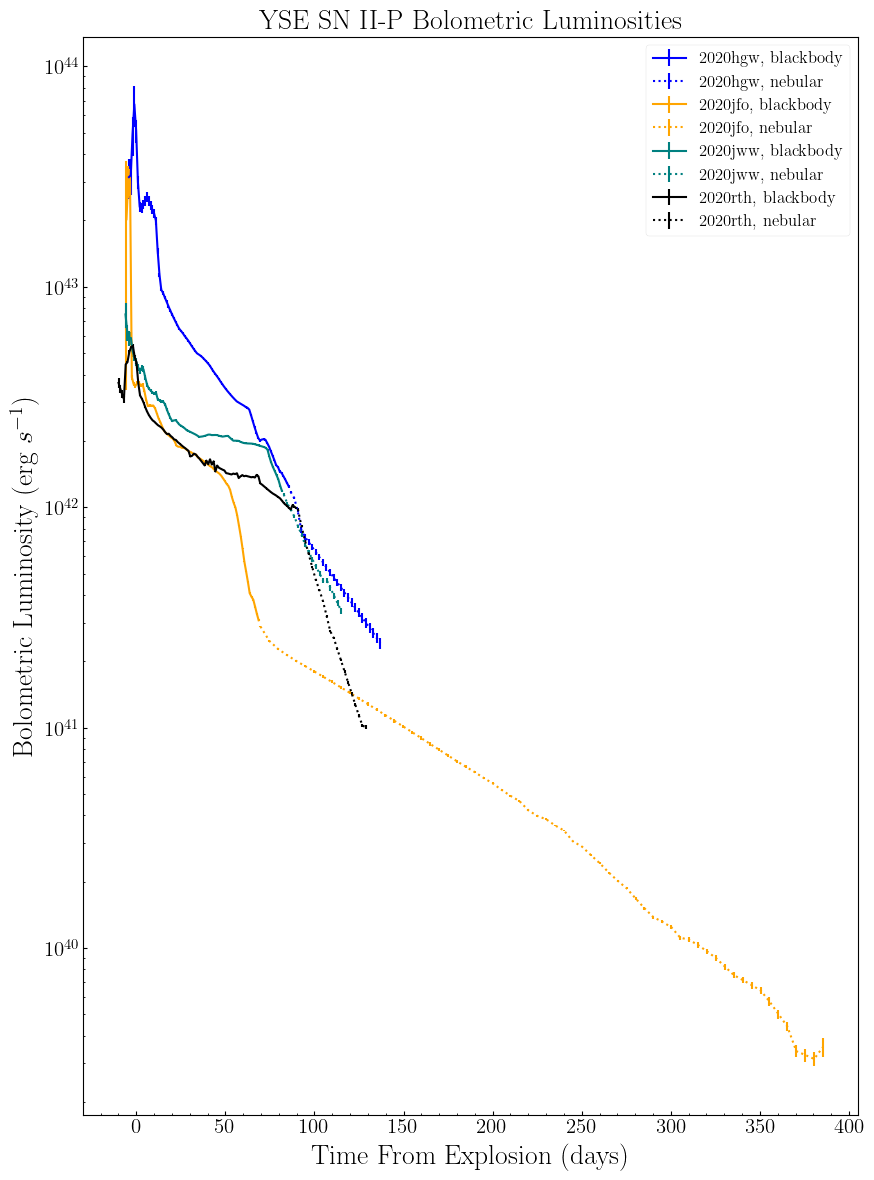

In [46]:
fig, ax = plt.subplots(figsize=(10,14))

legend_tuples = []
legend_tuples = []

hgw_line = ax.errorbar(hgw['MJD'][:90], hgw['lum'][:90], yerr = hgw['dlum'][:90], color = 'b', label = '2020hgw, blackbody')
hgw_line_neb = ax.errorbar(hgw['MJD'][90:142:2], hgw['lum'][90:142:2], yerr = hgw['dlum'][90:142:2], color='b', linestyle ='dotted', label = '2020hgw, nebular')
jfo_line = ax.errorbar(jfo['MJD'][:75], jfo['lum'][:75], yerr = jfo['dlum'][:75], color = 'orange', label = '2020jfo, blackbody')
jfo_line_neb = ax.errorbar(jfo['MJD'][75::5], jfo['lum'][75::5], yerr = jfo['dlum'][75::5], color = 'orange', linestyle = 'dotted', label = '2020jfo, nebular')
jww_line = ax.errorbar(jww['MJD'][:88], jww['lum'][:88], yerr = jww['dlum'][:88], color = 'teal', label = '2020jww, blackbody')
jww_line_neb = ax.errorbar(jww['MJD'][88::2], jww['lum'][88::2], yerr = jww['dlum'][88::2], linestyle = 'dotted', color = 'teal', label = '2020jww, nebular')
rth_line = ax.errorbar(rth['MJD'][:100], rth['lum'][:100], yerr = rth['dlum'][:100], label = '2020rth, blackbody', color = 'k')
rth_line_neb = ax.errorbar(rth['MJD'][100::2], rth['lum'][100::2], yerr = rth['dlum'][100::2], linestyle = 'dotted',label = '2020rth, nebular', color = 'k')

ax.set_yscale('log')
ax.legend(fontsize = 'large')
ax.set_xlabel('Time From Explosion (days)', fontsize = 20)
ax.set_ylabel('Bolometric Luminosity (erg $s^{-1}$)', fontsize = 20)
ax.set_title('YSE SN II-P Bolometric Luminosities', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)



# Haille's edits

In [88]:
import matplotlib.cm as cm

In [ ]:
# from all_YSE_data notebook
colors_cm = np.array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.19607843e-01, 2.79582593e-01, 9.89980213e-01, 1.00000000e+00],
       [1.39215686e-01, 5.36866598e-01, 9.60121645e-01, 1.00000000e+00],
       [4.11764706e-02, 7.51331890e-01, 9.11022649e-01, 1.00000000e+00],
       [2.29411765e-01, 9.11022649e-01, 8.40344072e-01, 1.00000000e+00],
       [4.09803922e-01, 9.89980213e-01, 7.55382735e-01, 1.00000000e+00],
       [5.90196078e-01, 9.89980213e-01, 6.55283850e-01, 1.00000000e+00],
       [7.70588235e-01, 9.11022649e-01, 5.42053356e-01, 1.00000000e+00],
       [9.58823529e-01, 7.51331890e-01, 4.12356317e-01, 1.00000000e+00],
       [1.00000000e+00, 5.36866598e-01, 2.79582593e-01, 1.00000000e+00],
       [1.00000000e+00, 2.79582593e-01, 1.41206152e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [128]:
names = ['2020hgw', '2020jfo', '2020jww', '2020rth']
neb_dict = {
    '2020hgw': [90, 142, 2],
    '2020jfo': [75, -1, 5],
    '2020jww': [88, 100, 2],
    '2020rth': [100, -1, 2]}

colors = {name: colors_cm[i] for name, i in zip(names, [2, 5, 8, 11])}

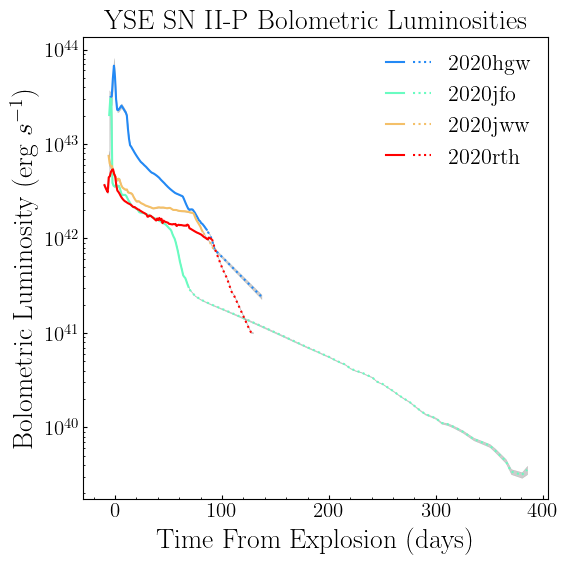

In [130]:
fig, ax = plt.subplots(figsize=(6,6))

label_tuples = []
legend_desc = ['2020hgw', 
               '2020jfo', 
               '2020jww', 
               '2020rth']

for i, data in enumerate([hgw, jfo, jww, rth]):
    name = list(neb_dict.keys())[i]
    start, end, step = neb_dict[name]
    color = colors[name]
    
    line = ax.plot(data['MJD'][:start], data['lum'][:start], color = color)
    line_neb = ax.plot(data['MJD'][start:end:step], data['lum'][start:end:step], 
                       color = color, linestyle = 'dotted')
    ax.fill_between(data['MJD'][:start+1], data['lum'][:start+1]-data['dlum'][:start+1], data['lum'][:start+1]+data['dlum'][:start+1],
                     color='k', alpha=0.2)
    ax.fill_between(data['MJD'][start:end:step], data['lum'][start:end:step]-data['dlum'][start:end:step], data['lum'][start:end:step]+data['dlum'][start:end:step],
                     color='k', alpha=0.2)
    
    label_tuples.append( (line[0], line_neb[0]) )

ax.set_yscale('log')
ax.set_xlabel('Time From Explosion (days)', fontsize = 20)
ax.set_ylabel('Bolometric Luminosity (erg $s^{-1}$)', fontsize = 20)
ax.set_title('YSE SN II-P Bolometric Luminosities', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)



logt = ''
if logt:
    ax.set_xscale('log')
    loc = 'lower left'
    logt = '_'+logt
else:
    ax.set_xscale('linear')
    loc = 'upper right'

ax.legend(label_tuples, legend_desc, ncol=1,
           handler_map={tuple: HandlerTuple(ndivide=2, pad=0.4)}, loc=loc,
           markerscale=1.0, borderpad=0.3, columnspacing=1.5, 
           fontsize=16, frameon=False)

plt.savefig(f'../../../light_curve_plots/all_bb_bol{logt}.pdf', dpi=300)
